In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [6]:
isna = df.isnull().sum().sum()
print("{} Missing values is not present".format(isna)) if isna == 0  else print("{} Missing values is present".format(isna))

0 Missing values is not present


## checking for Outliers

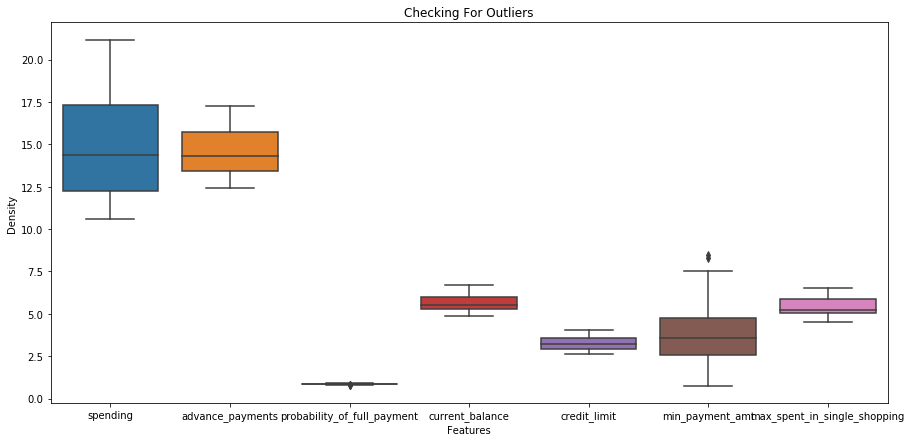

In [7]:
plt.figure(figsize=(15,7));
sns.boxplot(data=df);
plt.title('Checking For Outliers');
plt.xlabel('Features');
plt.ylabel('Density');

## Only min_payment_amt has outliers and will remove this.

In [8]:
def inter_quartile_range(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    ul = Q3 + 1.5*IQR
    ll = Q1 - 1.5*IQR
    return ll, ul

In [9]:
columns = [i for i in df.columns]
for i in columns:
    ll, ul = inter_quartile_range(df[i])
    df[i] = np.where(df[i] < ll, ll, df[i])
    df[i] = np.where(df[i] > ul, ul, df[i])    

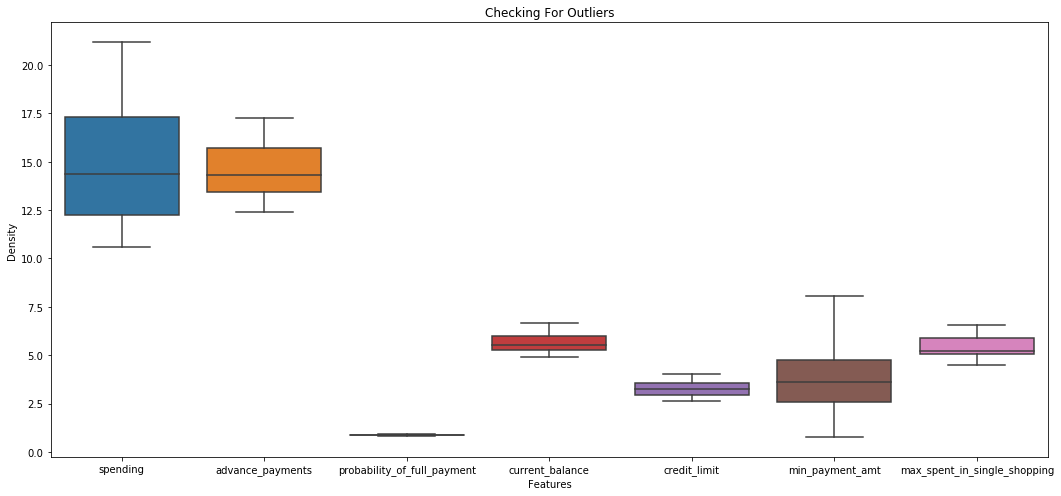

In [10]:
plt.figure(figsize=(15,7));
sns.boxplot(data=df);
plt.title('Checking For Outliers');
plt.xlabel('Features');
plt.ylabel('Density');
plt.tight_layout();

## Scaling the dataset

In [11]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=list(df))

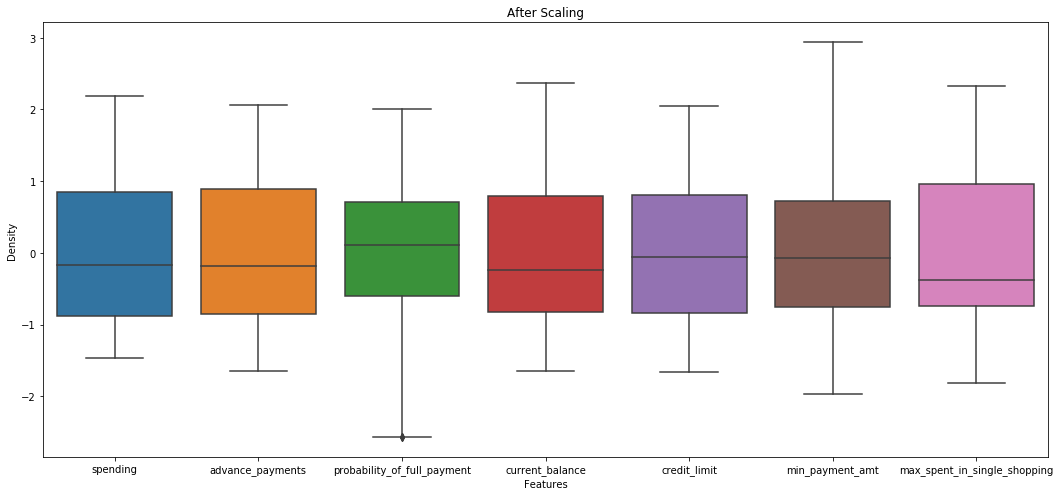

In [12]:
plt.figure(figsize=(15,7));
sns.boxplot(data=scaled_data);
plt.title('After Scaling');
plt.xlabel('Features');
plt.ylabel('Density');
plt.tight_layout();

## Hence, our features got scaled and looks perfectly on the same scale.

In [13]:
## checking duplicate data
is_dup = df.duplicated().sum()
print('No Duplicate record present in dataset') if is_dup == 0 else print('duplicate record is present')

No Duplicate record present in dataset
